In [ ]:
#libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from google.colab import files
!pip install diffprivlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from diffprivlib import models
import math
import random
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score, classification_report

# Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
uploaded_file = files.upload()
data=pd.read_csv("heart_disease_uci.csv")

Saving heart_disease_uci.csv to heart_disease_uci (3).csv


In [ ]:
data.drop(['id','dataset'], axis=1, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB
None


In [ ]:
# Drop columns with a great number of missing values and reassign datatypes

data.drop(labels=['ca','thal','slope'], axis=1, inplace=True)
data = data.astype({'sex':'category', 'cp':'category', 'fbs':'bool', 'restecg':'category', 'exang':'bool'})

# Drop remaining rows with missing values and display distribution for target variables

data.dropna(inplace=True)
data.value_counts()
# sns.countplot('num', data=data)
# plt.show()

age  sex     cp               trestbps  chol   fbs    restecg         thalch  exang  oldpeak  num
29   Male    atypical angina  130.0     204.0  False  lv hypertrophy  202.0   False  0.0      0      1
59   Male    typical angina   160.0     273.0  False  lv hypertrophy  125.0   False  0.0      1      1
             non-anginal      150.0     212.0  True   normal          157.0   False  1.6      0      1
                              126.0     218.0  True   normal          134.0   False  2.2      2      1
             atypical angina  140.0     221.0  False  normal          164.0   True   0.0      0      1
                                                                                                    ..
51   Male    asymptomatic     140.0     299.0  False  normal          173.0   True   1.6      1      1
                                        298.0  False  normal          122.0   True   4.2      3      1
                                        261.0  False  lv hypertrophy  186.0   

In [ ]:
data_onehot = pd.get_dummies(data, columns=['sex','cp', 'fbs', 'restecg', 'exang'])

X = data_onehot.drop('num', axis=1)
y = data_onehot.num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.value_counts(), y_train.value_counts(), X_test.value_counts(), y_test.value_counts())
# print(y.value_counts())
# print(y_train.value_counts())
# print(y_test.value_counts())
data_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   trestbps                  299 non-null    float64
 2   chol                      299 non-null    float64
 3   thalch                    299 non-null    float64
 4   oldpeak                   299 non-null    float64
 5   num                       299 non-null    int64  
 6   sex_Female                299 non-null    uint8  
 7   sex_Male                  299 non-null    uint8  
 8   cp_asymptomatic           299 non-null    uint8  
 9   cp_atypical angina        299 non-null    uint8  
 10  cp_non-anginal            299 non-null    uint8  
 11  cp_typical angina         299 non-null    uint8  
 12  fbs_False                 299 non-null    uint8  
 13  fbs_True                  299 non-null    uint8  
 14  restecg_lv

In [ ]:
weights = {0:1, 1:0.5, 2:0.5, 3:0.5, 4:0.5}

trained_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
trained_model = trained_model.fit(X_train, y_train)
y_prediction = trained_model.predict(X_test)

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.27      0.23      0.25        13
           2       0.29      0.40      0.33         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.57        60
   macro avg       0.27      0.29      0.28        60
weighted avg       0.54      0.57      0.55        60



In [ ]:
from diffprivlib import models

trained_model_dp = models.DecisionTreeClassifier(criterion='entropy', max_depth=5, epsilon= 0.1)
trained_model_dp = trained_model_dp.fit(X_train, y_train)
y_pred = trained_model_dp.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74        35
           1       0.00      0.00      0.00        13
           2       0.11      0.20      0.14         5
           3       0.29      0.50      0.36         4
           4       0.00      0.00      0.00         3

    accuracy                           0.52        60
   macro avg       0.22      0.30      0.25        60
weighted avg       0.43      0.52      0.47        60



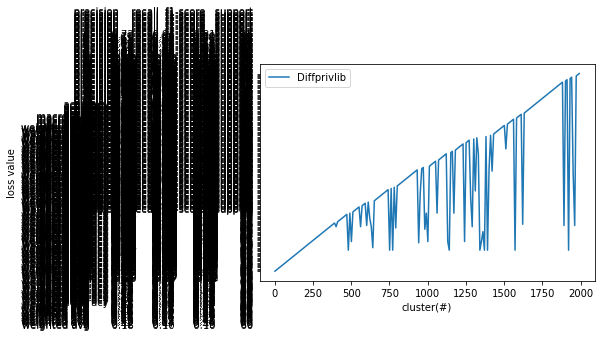

In [ ]:
%matplotlib inline
def graph(diffprivlib_loss):
  x=np.arange(1,2000,10)
  y_dp=diffprivlib_loss
  plt.plot(x,y_dp, label='Diffprivlib')
  plt.xlabel('cluster(#)')
  plt.ylabel('loss value')
  plt.legend()
  plt.show()

graph(diffprivlib_accuracy)

In [ ]:
from sklearn.cluster import KMeans
# def clustering(adult, cluster):
#     model=KMeans(cluster)
#     model.fit(adult)
#     value=model.inertia_
#     return value

# non_private_loss=clustering(data_onehot,5)

model=KMeans(5)
model.fit(X_test)
y_pre=model.labels_


In [ ]:
success_rate=accuracy_score(y_test, y_pre)
print(success_rate)

0.21666666666666667


In [ ]:
model_diffprivlib=models.KMeans(5, epsilon=1)

model_diffprivlib.fit(X_test)

y_pre_diffpri=model_diffprivlib.labels_

In [ ]:
success_rate_diffprivlib=accuracy_score(y_test, y_pre_diffpri)
print(success_rate)

0.21666666666666667
